# WHAT IS EDA
It's the forst approach to a dataset before applaying any model. It's needed to :
Understand the shape of our data.
Understand how the variables interact with each other.
Have a quick view of the less useful variables.
Extract some information before applaying any algorithm.
It often uses DATA VISUALATION to extract information from a dataset.

##  Importing the required libraries for EDA

In [1]:
import chardet #to open the file 
import seaborn as sns #visualisation
import pandas as pd
import re
import matplotlib.pyplot as plt #visualisation
import plotly.graph_objects as go
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True) #visualisation
from IPython.display import Image #visualisation
from pandas_profiling import ProfileReport

C:\Users\Public\Documents\Wondershare\CreatorTemp\ipykernel_72\260440548.py:10: DeprecationWarning:

`import pandas_profiling` is going to be deprecated by April 1st. Please use `import ydata_profiling` instead.



## Loading the data into data frame

In [2]:
with open('netflix.csv', 'rb') as f:
    result = chardet.detect(f.read())  # or readline if the file is large

df = pd.read_csv('netflix.csv', encoding=result['encoding'],header=None)
df1= pd.read_csv('titles.csv')
df2=pd.read_csv('dataprime.csv')
df3=pd.read_csv('datagenre.csv')
df4=pd.read_csv('dataregion.csv')

I added new datasets in order to add new columns to my main dataset 'netflix.csv'

## Renaming the columns

In [3]:
df2=df2.rename(columns={'rating':'imdb_score'})
data=df.rename(columns={0:'show_id',1:'type',2:'title',3:'director',4:'cast',5:'country',6:'date_added',7:'release_year',8:'rating',9:'duration',10:'listed_in',11:'description',12:'imdb_score'})

## Dropping irrelevant columns

In [4]:
data = data.drop('listed_in', axis=1)
data = data.drop('description', axis=1)
data = data.drop('date_added', axis=1)

## Merging the dataset using pandas method

In [5]:
merged_data=pd.merge(data,df2, on='title',how='left')

I merge two data frames on a common column callled title.

In [6]:
merged_data2=pd.merge(df2,df3 , on='dataId',how ='left')
merged_data3=pd.merge(df2,df4 , on='dataId', how='left')

Same here using the column dataId to extract the 'genre'and 'region' columns

In [7]:
data['imdb_score'] = merged_data['imdb_score']
data['genre']=merged_data2['genre']
data['country']=merged_data3['region']

I create a new column called 'country' in the 'data' and assigning the values from the 'region' column of the 'merged_data3' data frame to this new column

## Displaying the top 5 rows of each dataset

In [8]:
data.drop(data.index[0],inplace=True) 
df.drop(df.index[0],inplace=True)

 Dropping the first line because it only contains the same columns as the header

In [9]:
data.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,imdb_score,genre
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,7.4,Documentary
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",United States,2021,TV-MA,2 Seasons,6.7,Comedy
3,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,TV-MA,1 Season,7.1,Documentary
4,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United Kingdom,2021,TV-MA,1 Season,6.6,Horror
5,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",Italy,2021,TV-MA,2 Seasons,9.0,Horror


In [10]:
df1.head()

,id,title,type,description,release_year,age_certification,runtime,genres,production_countries,seasons,imdb_id,imdb_score,imdb_votes,tmdb_popularity,tmdb_score
0,ts300399,Five Came Back: The Reference Films,SHOW,This collection includes 12 World War II-era p...,1945,TV-MA,51,['documentation'],['US'],1.0,NaN,NaN,NaN,0.600,NaN
1,tm84618,Taxi Driver,MOVIE,A mentally unstable Vietnam War veteran works ...,1976,R,114,"['drama', 'crime']",['US'],NaN,tt0075314,8.2,808582.0,40.965,8.179
2,tm154986,Deliverance,MOVIE,Intent on seeing the Cahulawassee River before...,1972,R,109,"['drama', 'action', 'thriller', 'european']",['US'],NaN,tt0068473,7.7,107673.0,10.010,7.300
3,tm127384,Monty Python and the Holy Grail,MOVIE,"King Arthur, accompanied by his squire, recrui...",1975,PG,91,"['fantasy', 'action', 'comedy']",['GB'],NaN,tt0071853,8.2,534486.0,15.461,7.811
4,tm120801,The Dirty Dozen,MOVIE,12 American military prisoners in World War II...,1967,NaN,150,"['war', 'action']","['GB', 'US']",NaN,tt0061578,7.7,72662.0,20.398,7.600


In [11]:
df2.head()

,dataId,contentType,title,length,releaseYear,endYear,votes,imdb_score,gross,certificate,description
0,102795,movie,Ratha Kanneer,154,1954,-1,349,8.5,-1,NaN,"The story revolves around Mohanasundaram, a re..."
1,102796,movie,All Star Comedy Jam,89,-1,-1,349,7.5,-1,Not Rated,The Original King of Comedy and Shaquille O'Ne...
2,102797,movie,Faces of Death: Fact or Fiction?,54,-1,-1,349,2.9,-1,Unrated,Add a Plot\n
3,102798,movie,Don't Look,71,2018,-1,349,2.8,-1,NaN,"In the tradition of classic horror movies, ""Do..."
4,102799,movie,The Escape from Auschwitz,80,2020,-1,349,1.7,-1,TV-MA,After capturing Kazimierz Piechowski at the Hu...


In [12]:
df3.head()

,dataId,genre
0,102795,Drama
1,102796,Documentary
2,102796,Comedy
3,102797,Documentary
4,102797,Horror


In [13]:
df4.head()

,dataId,region
0,102795,India
1,102796,United States
2,102797,United States
3,102798,United States
4,102799,United Kingdom


## Checking the duplicate rows and the shape of the dataset

In [14]:
data.shape

(8807, 11)

8807 rows and 11 columns

In [15]:
data.duplicated().sum()

0

My dataset does not contain any duplicated rows

## Checking the types of data

In [16]:
data.dtypes

show_id          object
type             object
title            object
director         object
cast             object
country          object
release_year     object
rating           object
duration         object
imdb_score      float64
genre            object
dtype: object

## Analysing the NAN values

In [17]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
release_year       0
rating             4
duration           3
imdb_score      2935
genre              0
dtype: int64

In [18]:
data.isna().sum()/data.shape[0]

show_id         0.000000
type            0.000000
title           0.000000
director        0.299080
cast            0.093675
country         0.000000
release_year    0.000000
rating          0.000454
duration        0.000341
imdb_score      0.333258
genre           0.000000
dtype: float64

Percent of missing cells

In [19]:
(data.isna().sum()/data.shape[0]).sort_values()

show_id         0.000000
type            0.000000
title           0.000000
country         0.000000
release_year    0.000000
genre           0.000000
duration        0.000341
rating          0.000454
cast            0.093675
director        0.299080
imdb_score      0.333258
dtype: float64

Sorting the missing cells 

### Visualising the missing cells 

<AxesSubplot:>

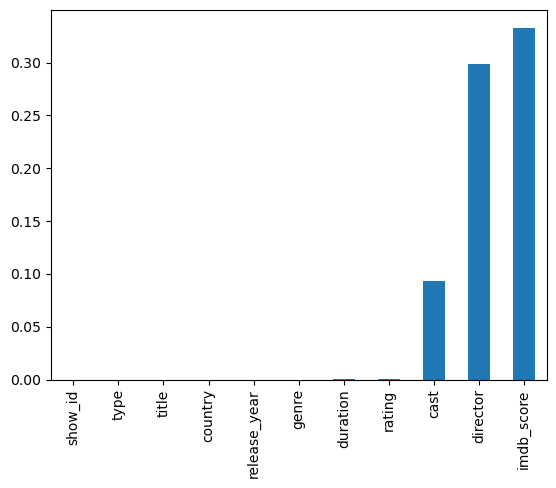

In [20]:
(data.isna().sum()/data.shape[0]).sort_values().plot(kind="bar") 

In [21]:
data['imdb_score'].fillna(data['imdb_score'].value_counts().index[0], inplace=True) 
data['rating'].fillna(data['rating'].value_counts().index[0], inplace=True)
data['duration'].fillna(data['duration'].value_counts().index[0], inplace=True)

This will fill the missing values columns with the most common value in each column. The inplace=True argument ensures that the changes are made to the original DataFrame.

we use index[0] to extract the most frequent value in each column from the series object returned by value_counts().

In [22]:
data.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country            0
release_year       0
rating             0
duration           0
imdb_score         0
genre              0
dtype: int64

I filled the missing cells with the most frequent value in each column (mode) to reduce the missing cells

## TOP 5 DIRECTOR

In [23]:
data['director'].head(10)

1                   Kirsten Johnson
2                               NaN
3                   Julien Leclercq
4                               NaN
5                               NaN
6                     Mike Flanagan
7     Robert Cullen, José Luis Ucha
8                      Haile Gerima
9                   Andy Devonshire
10                   Theodore Melfi
Name: director, dtype: object

In [24]:
data['director'].duplicated().sum()

4278

In [25]:
data['director'].unique().shape

(4529,)

It shows us the unique values in the column

In [26]:
top_director =data['director'].value_counts()[:5]

<AxesSubplot:>

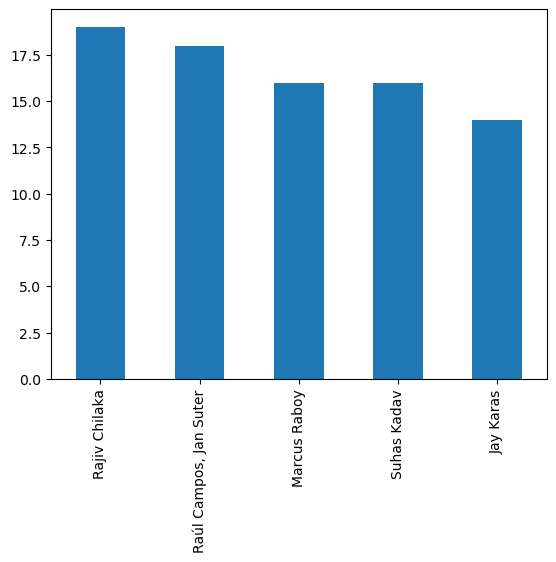

In [27]:
top_director.plot.bar()

## TOP SHOWS

In [28]:
pip install plotly

Note: you may need to restart the kernel to use updated packages.


In [29]:
grouped=data['type'].value_counts()

In [30]:
grouped

Movie      6131
TV Show    2676
Name: type, dtype: int64

In [31]:
grouped = data['type'].value_counts().reset_index()
grouped.columns = ['type', 'count']

I created an trace object using the class go.Pie() de Plotly using the 'group' informations


In [32]:
trace = go.Pie(labels=grouped['type'], values=grouped['count'], pull=[0.05, 0], marker=dict(colors=["#6ad49b", "#a678de"]))

pull to separate the two camembert .

In [33]:
layout = go.Layout(title="Distribution des types", height=400, legend=dict(x=0.1, y=1.1))

In [34]:
fig = go.Figure(data=[trace], layout=layout)

In [35]:
iplot(fig)

In [36]:
df_movies = data[data['type'] == "Movie"]

In [37]:
df_tv_shows = data[data['type'] == "TV Show"]

In [38]:
df_movies.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,imdb_score,genre
1,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2020,PG-13,90 min,7.4,Documentary
7,s7,Movie,My Little Pony: A New Generation,"Robert Cullen, José Luis Ucha","Vanessa Hudgens, Kimiko Glenn, James Marsden, ...",Hong Kong,2021,PG,91 min,6.8,War
8,s8,Movie,Sankofa,Haile Gerima,"Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...",United States,1993,TV-MA,125 min,7.0,Biography
10,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",Hong Kong,2021,PG-13,104 min,6.3,Action
13,s13,Movie,Je Suis Karl,Christian Schwochow,"Luna Wedler, Jannis Niewöhner, Milan Peschel, ...",Canada,2021,TV-MA,127 min,5.5,Drama


I create a new variable that only contain movies so i can analys it 

In [39]:
df_tv_shows.head()

,show_id,type,title,director,cast,country,release_year,rating,duration,imdb_score,genre
2,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",United States,2021,TV-MA,2 Seasons,6.7,Comedy
3,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",United States,2021,TV-MA,1 Season,7.1,Documentary
4,s4,TV Show,Jailbirds New Orleans,NaN,NaN,United Kingdom,2021,TV-MA,1 Season,6.6,Horror
5,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",Italy,2021,TV-MA,2 Seasons,9.0,Horror
6,s6,TV Show,Midnight Mass,Mike Flanagan,"Kate Siegel, Zach Gilford, Hamish Linklater, H...",Italy,2021,TV-MA,1 Season,7.7,Drama


Same for tv shows

### Top tv shows sorted by Imdb

In [40]:
top_tvshows=df_tv_shows[['title', 'imdb_score']].nlargest(5, 'imdb_score').reset_index(drop=True)

In [41]:
top_tvshows

,title,imdb_score
0,Call My Agent!,9.8
1,Hilda,9.1
2,GAME ON: A Comedy Crossover Event,9.1
3,Mystic Whispers,9.1
4,Kota Factory,9.0


### Top movies sorted by Imdb

In [42]:
top_movies=df_movies[['title', 'imdb_score']].nlargest(5, 'imdb_score').reset_index(drop=True)


In [43]:
top_movies

,title,imdb_score
0,Department,9.5
1,Berlin Kaplani,9.5
2,Tarzan 2,9.5
3,Surviving R. Kelly: The Impact,9.3
4,IO,9.3


## Analysing the duration of movies

In [44]:
df_movies = df_movies[df_movies['duration'].notna()]

I dropped the Nan values because the regular expression can not work with Nan values

In [45]:
df_movies['duration'].shape[0]

6131

In [46]:
dfff =df_movies.dropna(inplace=True)

In [47]:
df_movies["duration"] = df_movies['duration'].apply(lambda x : int(re.findall(r'\d+', x)[0])) 

In [48]:
df_movies.describe()

,duration,imdb_score
count,5522.000000,5522.000000
mean,102.182905,6.795273
std,26.911702,1.021026
min,1.000000,1.500000
25%,89.000000,6.300000
50%,100.000000,7.300000
75%,116.000000,7.300000
max,253.000000,9.500000


The average of duration of films is 102 min (1h42min),
The maximun duration is 253 min (4h13min),
The minimum is 1min

## Top 5 category

In [49]:
sort_by_category=data['genre'].value_counts()[0:5]

<AxesSubplot:>

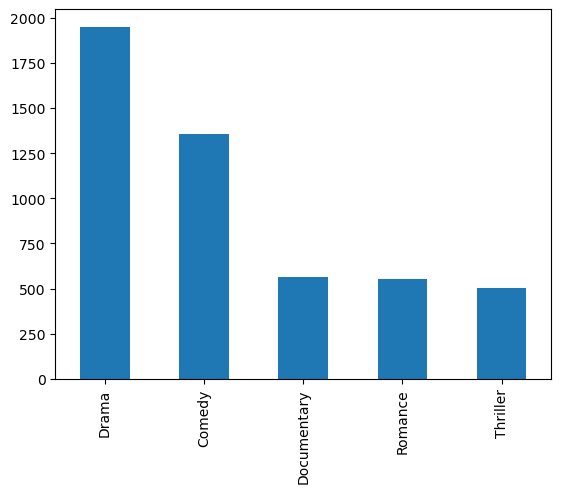

In [50]:
sort_by_category.plot.bar()

## Top 5 Country

In [51]:
top_country=data['country'].value_counts()[:5]

<AxesSubplot:>

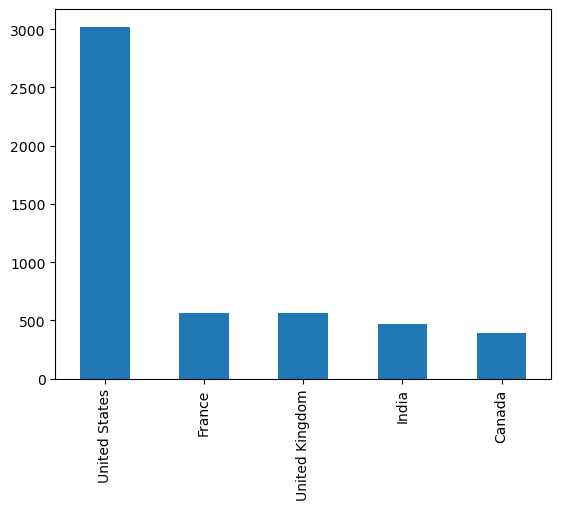

In [52]:
top_country.plot.bar()

## Top 5 Cast


In [53]:
actor_list = []
for row in data['cast']:
    if type(row) == str:
        actors = row.split(', ')
        actor_list.extend(actors)
actor_counts = pd.Series(actor_list).value_counts()

In [54]:
print(actor_counts.head(5))

Anupam Kher         43
Shah Rukh Khan      35
Julie Tejwani       33
Naseeruddin Shah    32
Takahiro Sakurai    32
dtype: int64


<AxesSubplot:>

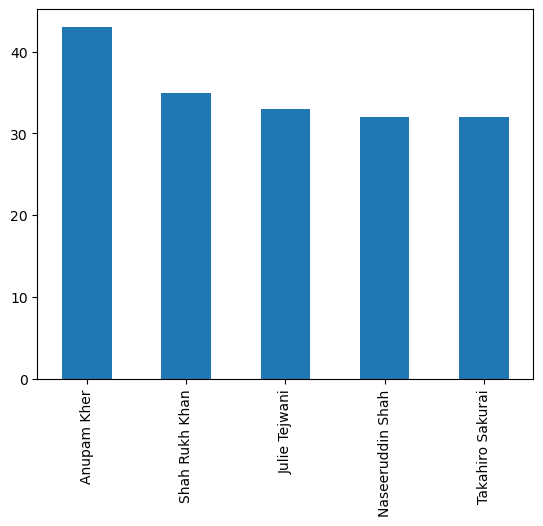

In [55]:
actor_counts.head(5).plot.bar()

## Top 5 Year

In [56]:
top_release_year=data['release_year'].value_counts()[:5]

<AxesSubplot:>

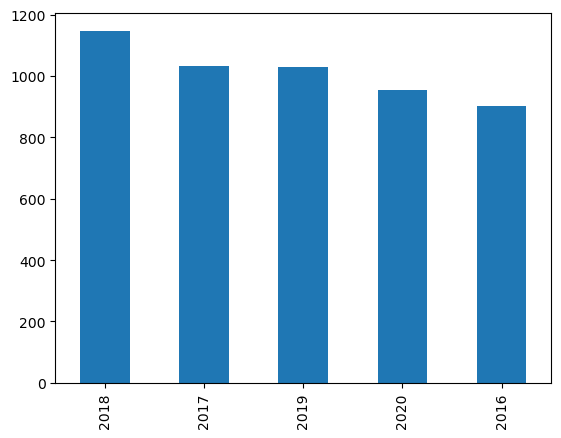

In [57]:
top_release_year.plot.bar()

## Top 5 Age rating

In [58]:
top_rating=data['rating'].value_counts()[:5]

<AxesSubplot:>

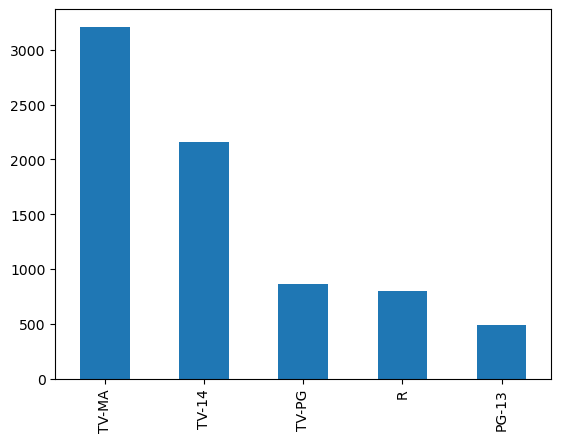

In [59]:
top_rating.plot.bar()

In [60]:

col = "release_year"

vc1 = df_tv_shows[col].value_counts().reset_index()
vc1 = vc1.rename(columns = {col : "count", "index" : col})
vc1['percent'] = vc1['count'].apply(lambda x : 100*x/sum(vc1['count']))
vc1 = vc1.sort_values(col)

vc2 = df_movies[col].value_counts().reset_index()
vc2 = vc2.rename(columns = {col : "count", "index" : col})
vc2['percent'] = vc2['count'].apply(lambda x : 100*x/sum(vc2['count']))
vc2 = vc2.sort_values(col)

trace1 = go.Bar(x=vc1[col], y=vc1["count"], name="TV Shows", marker=dict(color="#a678de"))
trace2 = go.Bar(x=vc2[col], y=vc2["count"], name="Movies", marker=dict(color="#6ad49b"))
cord = [trace1, trace2]
layout = go.Layout(title="Content added over the years", legend=dict(x=0.1, y=1.1, orientation="h"))
fig = go.Figure(cord, layout=layout)
fig.show()


### We notice  that Netflix in the last  3 years produces Tv Shows more Than Movies 

![alt text](newplot.png)


In [61]:
!pip install pandas-profiling

In [62]:
report= ProfileReport(data)

In [63]:
report.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [64]:
report.to_file("report.html",silent=False)

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]